## Исследование экспресс заказов по часам среди ДС

Гипотезы:

1. В вечернее время доля экспрессов по часам значительно превышает среднее значение по дню на ДС Лобачевского, Автоград, Каширский двор. (Подсчет показателей с 1 по 25 января).
2. На ДС Лобачевского, Автоград, Каширский двор в вечернее время преобладают большие экспресс заказы > 10 наименований в заказе (Average item order - AIV > 10). Определить топ складов с наибольшим средним количеством наименований в экспресс заказах в разное время дня из ТОП 10 по GMV.
3. AIV экспрессов на ДС Лобачевского больше чем в топ-10 складов по торговле.



## Исследование гипотезы №1

In [1]:
import pandas as pd
import os
os.getcwd()

'/Users/ivankomarov'

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = '/Users/ivankomarov/Сплит заказов по часам.xlsx'
orders_in_hours = pd.read_excel(data, index_col=0)

In [4]:

orders_in_hours.reset_index(inplace=True)
orders_in_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72282 entries, 0 to 72281
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FactDate      72282 non-null  datetime64[ns]
 1   FactHour      72282 non-null  int64         
 2   DS            72282 non-null  object        
 3   DeliveryType  72282 non-null  object        
 4   GMV_D         72282 non-null  float64       
 5   Orders_D      72282 non-null  int64         
 6   Items_D       72282 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 3.9+ MB


In [5]:
orders_in_hours.head()

,FactDate,FactHour,DS,DeliveryType,GMV_D,Orders_D,Items_D
0,2023-01-01,0,FRESH_MAX_МСК_НОВАЯ_РИГА,Regular,2174.1667,1,1
1,2023-01-01,11,FRESH_MAX_СПБ_ЛИГОВСКИЙ,ПВЗ,564.0000,1,1
2,2023-01-01,12,FRESH_MAX_КДР_МЕДИА_ПЛАЗА,ПВЗ,3325.0000,1,1
3,2023-01-01,13,FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ,Regular,2325.0000,1,1
4,2023-01-01,13,FRESH_MAX_КЗН_ОРЕНБУРГСКИЙ,Regular,585.0000,1,5


In [6]:
from datetime import date, time, datetime
orders_in_hours.isnull().sum()


FactDate        0
FactHour        0
DS              0
DeliveryType    0
GMV_D           0
Orders_D        0
Items_D         0
dtype: int64

In [7]:
print(orders_in_hours['DeliveryType'].sort_values().unique())

['B2B' 'Express' 'NonGroc' 'Regular' 'Strizh' 'SuperExpress' 'ПВЗ'
 'Прочее']


In [8]:
# посчитаем общее количество заказов(Regular, Express, SuperExpress, Strizh) на каждом складе с 1 по 25 января
orders_sum_per_ds = orders_in_hours.loc[lambda x: (orders_in_hours['DeliveryType'] != 'ПВЗ') & (orders_in_hours['DeliveryType'] != 'NonGroc') & (orders_in_hours['DeliveryType'] != 'B2B') & (orders_in_hours['DeliveryType'] != 'Прочее')]

orders_sum_per_ds = orders_sum_per_ds.groupby('DS')['Orders_D'].sum().sort_values(ascending = False)


In [9]:
# отфильтруем заказы по типу экспрессы и суперэкспрессы на каждом складе с 1 по 25 января
express_per_ds = orders_in_hours.loc[lambda x: (orders_in_hours['DeliveryType'] != 'Regular') & (orders_in_hours['DeliveryType'] != 'ПВЗ') & (orders_in_hours['DeliveryType'] != 'NonGroc') & (orders_in_hours['DeliveryType'] != 'B2B') & (orders_in_hours['DeliveryType'] != 'Прочее') & (orders_in_hours['DeliveryType'] != 'Strizh')]


In [10]:
# посчитаем количество экспрессов и суперэкспрессов на каждом складе
sum_express_per_ds = express_per_ds.groupby('DS')['Orders_D'].sum().sort_values(ascending = False)


In [11]:
#выведем табличку с общим количеством заказов (без ПВЗ) с 1 по 25 января
all_orders_svod_table = pd.DataFrame(orders_sum_per_ds)

print(all_orders_svod_table)

                                     Orders_D
DS                                           
FRESH_MAX_МСК_ПРАВОБЕРЕЖНЫЙ             61682
FRESH_MAX_СПБ_РАУМ_БУГРЫ                58960
FRESH_MAX_МСК_МИТИНО                    56265
FRESH_MAX_СПБ_ЛОГОПАРК                  55298
FRESH_MAX_МСК_АВТОГРАД                  53238
FRESH_MAX_МСК_ТЮМЕНСКИЙ                 53230
FRESH_MAX_МСК_КАШИРСКИЙ_ДВОР            52303
FRESH_MAX_СПБ_БЕСТУЖЕВСКИЙ              50625
FRESH_MAX_МСК_КУНЦЕВО                   50598
FRESH_MAX_МСК_ЛОБАЧЕВСКОГО              49544
FRESH_MAX_МСК_ОДИНЦОВО                  49066
FRESH_MAX_МСК_КРАСНАЯ_ПРЕСНЯ            48340
FRESH_MAX_МСК_ЕВРОПОЛИС                 48042
FRESH_MAX_СПБ_ЛИГОВСКИЙ                 46237
FRESH_MAX_СПБ_МЕБЕЛЬНАЯ                 44402
FRESH_MAX_МСК_ПОДОЛЬСК                  44389
FRESH_MAX_МСК_ТРОИЦК                    44325
FRESH_MAX_МСК_САВЕЛОВСКИЙ               42032
FRESH_MAX_МСК_САЛАРЬЕВО                 41403
FRESH_MAX_МСК_НОВАЯ_РИГА          

In [12]:
#выведем табличку с общим количеством экспрессов с 1 по 25 января
express_order_svod_table = pd.DataFrame(sum_express_per_ds)
express_order_svod_table = express_order_svod_table.rename(columns={express_order_svod_table.columns[0]: "Express"})


In [13]:
# сводим данные в одну таблицу
order_table = pd.concat([all_orders_svod_table,express_order_svod_table], sort = False, axis = 1)

print(order_table)

                                     Orders_D  Express
DS                                                    
FRESH_MAX_МСК_ПРАВОБЕРЕЖНЫЙ             61682  18751.0
FRESH_MAX_СПБ_РАУМ_БУГРЫ                58960   6473.0
FRESH_MAX_МСК_МИТИНО                    56265  13331.0
FRESH_MAX_СПБ_ЛОГОПАРК                  55298  11236.0
FRESH_MAX_МСК_АВТОГРАД                  53238  13229.0
FRESH_MAX_МСК_ТЮМЕНСКИЙ                 53230  17978.0
FRESH_MAX_МСК_КАШИРСКИЙ_ДВОР            52303  17363.0
FRESH_MAX_СПБ_БЕСТУЖЕВСКИЙ              50625   9681.0
FRESH_MAX_МСК_КУНЦЕВО                   50598  10614.0
FRESH_MAX_МСК_ЛОБАЧЕВСКОГО              49544  15745.0
FRESH_MAX_МСК_ОДИНЦОВО                  49066   5869.0
FRESH_MAX_МСК_КРАСНАЯ_ПРЕСНЯ            48340  14504.0
FRESH_MAX_МСК_ЕВРОПОЛИС                 48042  16425.0
FRESH_MAX_СПБ_ЛИГОВСКИЙ                 46237   8395.0
FRESH_MAX_СПБ_МЕБЕЛЬНАЯ                 44402   7776.0
FRESH_MAX_МСК_ПОДОЛЬСК                  44389   4933.0
FRESH_MAX_

In [14]:
order_table.dropna()

,Orders_D,Express
DS,,
FRESH_MAX_МСК_ПРАВОБЕРЕЖНЫЙ,61682,18751.0
FRESH_MAX_СПБ_РАУМ_БУГРЫ,58960,6473.0
FRESH_MAX_МСК_МИТИНО,56265,13331.0
FRESH_MAX_СПБ_ЛОГОПАРК,55298,11236.0
FRESH_MAX_МСК_АВТОГРАД,53238,13229.0
FRESH_MAX_МСК_ТЮМЕНСКИЙ,53230,17978.0
FRESH_MAX_МСК_КАШИРСКИЙ_ДВОР,52303,17363.0
FRESH_MAX_СПБ_БЕСТУЖЕВСКИЙ,50625,9681.0
FRESH_MAX_МСК_КУНЦЕВО,50598,10614.0


In [15]:
# считаем долю экспрессов от общего числа заказов (без ПВЗ) и добавляем столбец в таблицу
order_table['dolya_exp'] = round((order_table['Express'] / order_table['Orders_D'] * 100), 1)
order_table.dropna()

print(order_table.sort_values(by = ['dolya_exp'], ascending = False))

                                     Orders_D  Express  dolya_exp
DS                                                               
FRESH_MAX_МСК_МОСКВА_СИТИ               21624   9052.0       41.9
FRESH_MAX_МСК_КРЫМСКАЯ                  31919  11374.0       35.6
FRESH_MAX_МСК_ЕВРОПОЛИС                 48042  16425.0       34.2
FRESH_MAX_МСК_ТЮМЕНСКИЙ                 53230  17978.0       33.8
FRESH_MAX_МСК_ШАРИКОПОДШИПНИКОВСКАЯ     29452   9862.0       33.5
FRESH_MAX_МСК_САВЕЛОВСКИЙ               42032  13955.0       33.2
FRESH_MAX_МСК_КАШИРСКИЙ_ДВОР            52303  17363.0       33.2
FRESH_MAX_ТВЕРЬ_КАЛИНИНА                29681   9648.0       32.5
FRESH_MAX_МСК_ЛОБАЧЕВСКОГО              49544  15745.0       31.8
FRESH_MAX_МСК_ПРАВОБЕРЕЖНЫЙ             61682  18751.0       30.4
FRESH_MAX_МСК_КРАСНАЯ_ПРЕСНЯ            48340  14504.0       30.0
FRESH_MAX_МСК_ПРИВОЛЬНАЯ                31094   8927.0       28.7
FRESH_MAX_МСК_АТРИУМ                    18731   5152.0       27.5
FRESH_MAX_

In [16]:
orders_in_hours[(orders_in_hours['DS'] == 'FRESH_MAX_МСК_ЛОБАЧЕВСКОГО')  & (orders_in_hours['DeliveryType'] != 'ПВЗ') & (orders_in_hours['DeliveryType'] != 'NonGroc') & (orders_in_hours['DeliveryType'] != 'B2B') & (orders_in_hours['DeliveryType'] != 'Прочее') & (orders_in_hours['DeliveryType'] != 'Strizh')].groupby('FactHour')['Orders_D'].sum()

FactHour
0      737
1      165
2       17
5       10
6      200
7      829
8     1189
9     1795
10    2548
11    3059
12    3133
13    3100
14    3183
15    3381
16    3410
17    3437
18    3587
19    3752
20    3840
21    3504
22    2738
23    1930
Name: Orders_D, dtype: int64

In [17]:
orders_in_hours[(orders_in_hours['DS'] == 'FRESH_MAX_МСК_ЛОБАЧЕВСКОГО') & (orders_in_hours['DeliveryType'] == 'Express')].groupby('FactHour')['Items_D'].sum()

FactHour
0       815
1       190
6       102
7       678
8      1345
9      3606
10     7619
11    10174
12    11250
13    12307
14    11904
15    12087
16    11988
17    11150
18    11112
19    12377
20    12042
21    11028
22     8512
23     5469
Name: Items_D, dtype: int64

In [18]:
#сводим таблицы для ДС Лобачевского, Каширский Двор, Автоград по общему количеству экспрессов в каждый час суток
lobachevskogo_express_in_hours = pd.DataFrame(orders_in_hours[(orders_in_hours['DS'] == 'FRESH_MAX_МСК_ЛОБАЧЕВСКОГО')  & (orders_in_hours['DeliveryType'] == 'Express')].groupby('FactHour')['Orders_D'].sum())
kashirka_express_in_hours = pd.DataFrame(orders_in_hours[(orders_in_hours['DS'] == 'FRESH_MAX_МСК_КАШИРСКИЙ_ДВОР')  & (orders_in_hours['DeliveryType'] == 'Express')].groupby('FactHour')['Orders_D'].sum())
avtograd_express_in_hours = pd.DataFrame(orders_in_hours[(orders_in_hours['DS'] == 'FRESH_MAX_МСК_АВТОГРАД')  & (orders_in_hours['DeliveryType'] == 'Express')].groupby('FactHour')['Orders_D'].sum())

In [19]:
#сводим таблицы для ДС Лобачевского, Каширский Двор, Автоград по общему количеству регуляров и стрижей(без ПВЗ)
#в каждый час суток с 1 по 25 января

lobachevskogo_orders_in_hours = pd.DataFrame(orders_in_hours[(orders_in_hours['DS'] == 'FRESH_MAX_МСК_ЛОБАЧЕВСКОГО')  & (orders_in_hours['DeliveryType'] != 'ПВЗ') & (orders_in_hours['DeliveryType'] != 'NonGroc') & (orders_in_hours['DeliveryType'] != 'B2B') & (orders_in_hours['DeliveryType'] != 'Прочее') & (orders_in_hours['DeliveryType'] != 'Strizh')].groupby('FactHour')['Orders_D'].sum())
kashirka_orders_in_hours = pd.DataFrame(orders_in_hours[(orders_in_hours['DS'] == 'FRESH_MAX_МСК_КАШИРСКИЙ_ДВОР')  & (orders_in_hours['DeliveryType'] != 'ПВЗ') & (orders_in_hours['DeliveryType'] != 'NonGroc') & (orders_in_hours['DeliveryType'] != 'B2B') & (orders_in_hours['DeliveryType'] != 'Прочее') & (orders_in_hours['DeliveryType'] != 'Strizh')].groupby('FactHour')['Orders_D'].sum())
avtograd_orders_in_hours = pd.DataFrame(orders_in_hours[(orders_in_hours['DS'] == 'FRESH_MAX_МСК_АВТОГРАД')  & (orders_in_hours['DeliveryType'] != 'ПВЗ') & (orders_in_hours['DeliveryType'] != 'NonGroc') & (orders_in_hours['DeliveryType'] != 'B2B') & (orders_in_hours['DeliveryType'] != 'Прочее') & (orders_in_hours['DeliveryType'] != 'Strizh')].groupby('FactHour')['Orders_D'].sum())

In [20]:
lobachevskogo_express_in_hours = lobachevskogo_express_in_hours.rename(columns={lobachevskogo_express_in_hours.columns[0]: "Express"})

kashirka_express_in_hours = kashirka_express_in_hours.rename(columns={kashirka_express_in_hours.columns[0]: "Express"})

avtograd_express_in_hours = avtograd_express_in_hours.rename(columns={avtograd_express_in_hours.columns[0]: "Express"})


In [21]:
#объединяем данные таблиц с экспрессами и регулярами для подсчета доли экспрессов в каждом часе суток, 
#чтобы проверить первую гипотезу
lobachevskogo_svod = pd.concat([lobachevskogo_orders_in_hours,lobachevskogo_express_in_hours], sort = False, axis = 1)

kashirka_svod = pd.concat([kashirka_orders_in_hours,kashirka_express_in_hours], sort = False, axis = 1)

avtograd_svod = pd.concat([avtograd_orders_in_hours,avtograd_express_in_hours], sort = False, axis = 1)



In [22]:
lobachevskogo_svod['dolya_exp'] = round((lobachevskogo_svod['Express'] / lobachevskogo_svod['Orders_D'] * 100), 1)
lobachevskogo_svod.dropna()

print('                  Лобачевского')
print(lobachevskogo_svod)
print()

kashirka_svod['dolya_exp'] = round((kashirka_svod['Express'] / kashirka_svod['Orders_D'] * 100), 1)
kashirka_svod.dropna()

print('                  Каширский Двор')
print(kashirka_svod)
print()

avtograd_svod['dolya_exp'] = round((avtograd_svod['Express'] / avtograd_svod['Orders_D'] * 100), 1)
avtograd_svod.dropna()

print('                  Автоград')
print(avtograd_svod)
print()

                  Лобачевского
          Orders_D  Express  dolya_exp
FactHour                              
0              737     65.0        8.8
1              165     19.0       11.5
2               17      NaN        NaN
5               10      NaN        NaN
6              200      8.0        4.0
7              829     80.0        9.7
8             1189    181.0       15.2
9             1795    391.0       21.8
10            2548    722.0       28.3
11            3059    967.0       31.6
12            3133   1113.0       35.5
13            3100   1153.0       37.2
14            3183   1157.0       36.3
15            3381   1220.0       36.1
16            3410   1172.0       34.4
17            3437   1134.0       33.0
18            3587   1174.0       32.7
19            3752   1196.0       31.9
20            3840   1200.0       31.2
21            3504   1161.0       33.1
22            2738    999.0       36.5
23            1930    633.0       32.8

                  Каширский Двор

In [23]:
lobachevskogo_svod.reset_index(inplace=True)
kashirka_svod.reset_index(inplace=True)
avtograd_svod.reset_index(inplace=True)

Text(0.5, 1.0, 'Доля экспрессов по часам на ДС Лобачевского')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


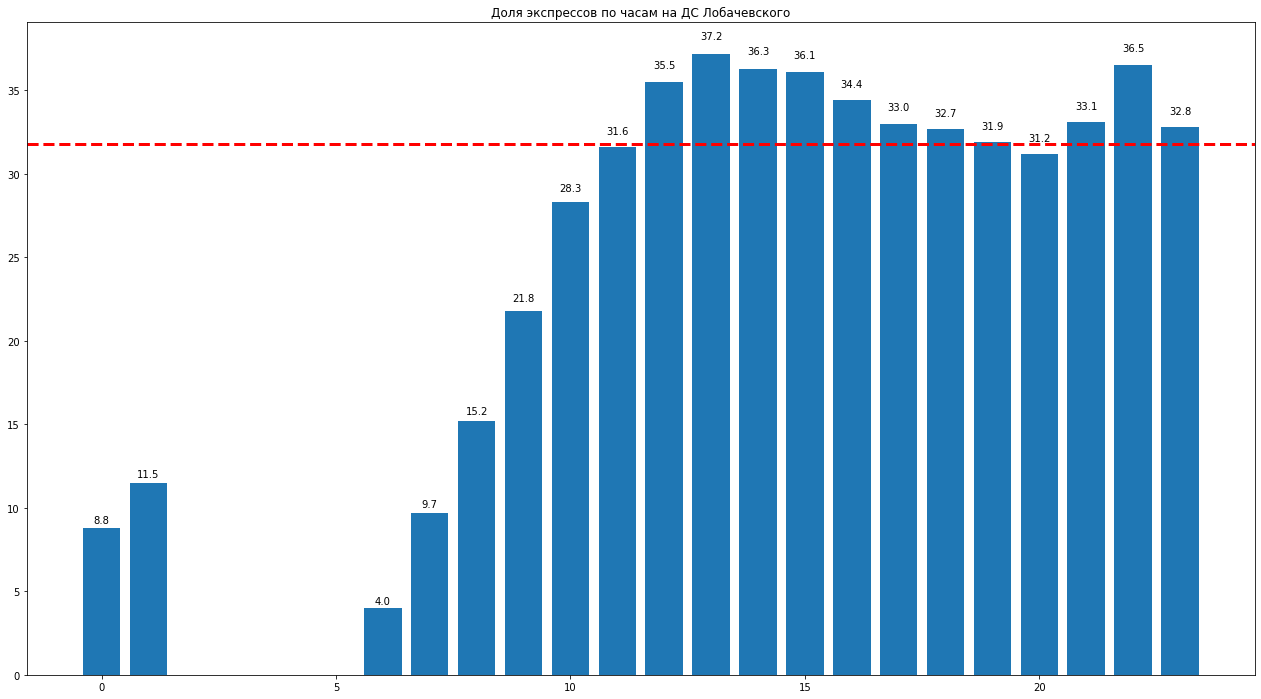

In [24]:

x = lobachevskogo_svod['FactHour']
y = lobachevskogo_svod['dolya_exp']
plt.figure(figsize=(22,12))
plt.bar(x, y)

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, y, height_factor=1.02)
plt.axhline(y = 31.8, color = 'red', linestyle = '--', linewidth = 3, label = 'Avg')
ax.set_title('Доля экспрессов по часам на ДС Лобачевского')

Text(0.5, 1.0, 'Доля экспрессов по часам на ДС Каширский Двор')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


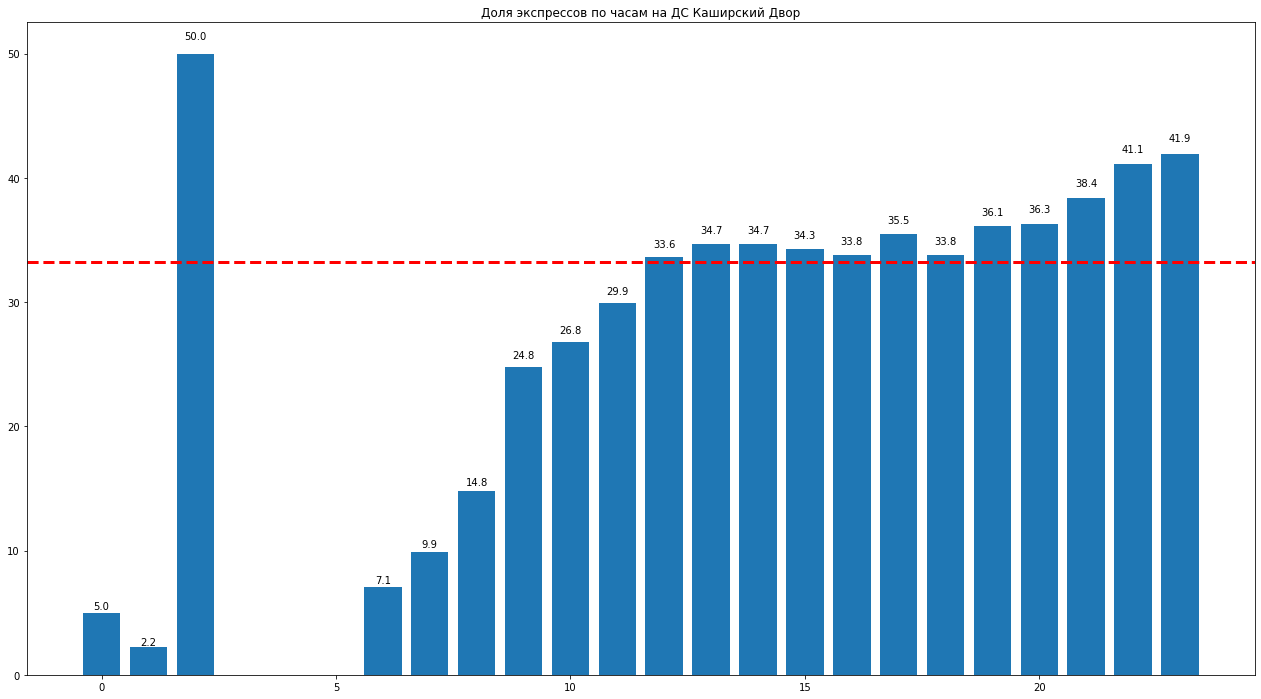

In [25]:
x = kashirka_svod['FactHour']
y = kashirka_svod['dolya_exp']
plt.figure(figsize=(22,12))
plt.bar(x, y)

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, y, height_factor=1.02)
plt.axhline(y = 33.2, color = 'red', linestyle = '--', linewidth = 3, label = 'Avg')
ax.set_title('Доля экспрессов по часам на ДС Каширский Двор')

Text(0.5, 1.0, 'Доля экспрессов по часам на ДС Автоград')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


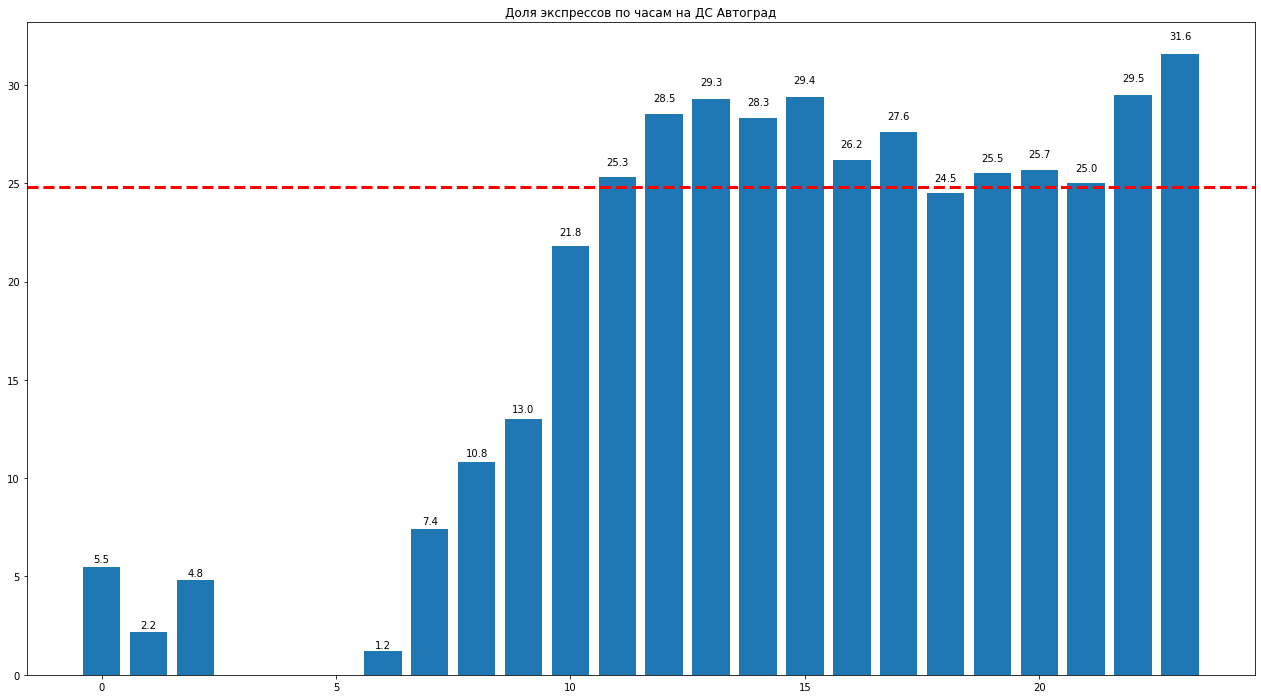

In [26]:
x = avtograd_svod['FactHour']
y = avtograd_svod['dolya_exp']
plt.figure(figsize=(22,12))
plt.bar(x, y)

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, y, height_factor=1.02)
plt.axhline(y = 24.8, color = 'red', linestyle = '--', linewidth = 3, label = 'Avg')
ax.set_title('Доля экспрессов по часам на ДС Автоград')

## Вывод: гипотеза №1

"В вечернее время доля экспрессов по часам превышает среднее значение по дню на ДС Лобачевского, Автоград, Каширский двор."
Доля экспрессов в общем количестве заказов (без ПВЗ) с 1 по 25 января:
Лобачевского - 31.8
Каширский Двор - 33.2
Автоград - 24.8

По графикам видно:
Лобачевского с 17 до 21 небольшое превышение среднего значения в пределах 1,5%. Сильное превышение среднего значения идет с 22 до 23. Но это не критично.
Каширский двор с 19 до 23 идет существенное превышение средней доли экспрессов в интервале от 4 до 8%.
Автоград с 18 до 22 превышение в пределах 1%. Сильный всплеск с 22 до 00 с превышением среднесуточной доли экспрессов от 4,7 до 6,8%.

Таким образом, гипотеза подтверждена только на ДС Каширский Двор. Лобачевского и Автоград значительные вспески %экспрессов в промежуток с 22 до 00.

## Исследование гипотезы №2

In [27]:
lobachevskogo_express_items_in_hours = pd.DataFrame(orders_in_hours[(orders_in_hours['DS'] == 'FRESH_MAX_МСК_ЛОБАЧЕВСКОГО') & (orders_in_hours['DeliveryType'] == 'Express')].groupby('FactHour')['Items_D'].sum())
print(lobachevskogo_express_items_in_hours)

          Items_D
FactHour         
0             815
1             190
6             102
7             678
8            1345
9            3606
10           7619
11          10174
12          11250
13          12307
14          11904
15          12087
16          11988
17          11150
18          11112
19          12377
20          12042
21          11028
22           8512
23           5469


In [28]:
lobachevskogo_item_svod = pd.concat([lobachevskogo_express_in_hours, lobachevskogo_express_items_in_hours], sort = False, axis = 1)
lobachevskogo_item_svod.reset_index(inplace=True)


In [29]:
lobachevskogo_item_svod['AIV_Express'] = round((lobachevskogo_item_svod['Items_D'] / lobachevskogo_item_svod['Express'] ), 2)


In [30]:
lobachevskogo_obschee_items_in_hours = pd.DataFrame(orders_in_hours[(orders_in_hours['DS'] == 'FRESH_MAX_МСК_ЛОБАЧЕВСКОГО') & (orders_in_hours['DeliveryType'] != 'ПВЗ') & (orders_in_hours['DeliveryType'] != 'NonGroc') & (orders_in_hours['DeliveryType'] != 'B2B') & (orders_in_hours['DeliveryType'] != 'Прочее')].groupby('FactHour')['Items_D'].sum())


In [31]:
lobachevskogo_obschee_svod = pd.concat([lobachevskogo_orders_in_hours, lobachevskogo_obschee_items_in_hours], sort = False, axis = 1)
lobachevskogo_obschee_svod.reset_index(inplace=True)



In [32]:
lobachevskogo_obschee_svod['AIV_Obschee'] = round((lobachevskogo_obschee_svod['Items_D'] / lobachevskogo_obschee_svod['Orders_D'] ), 2)


In [33]:
import datetime
import numpy as np
dt1 = datetime.date(2023, 1, 9).isoformat()
dt2 = datetime.date(2023, 1, 25).isoformat()
#функция подсчета AIV по часам и среднего за введенный промежуток дней и времени
def aiv(orders_in_hours, dt1, dt2, FactHourStart, FactHourFinish, DS, DeliveryType): 
    svod = orders_in_hours[(orders_in_hours['FactDate'] >= dt1) & (orders_in_hours['FactDate'] <= dt2) & (orders_in_hours['FactHour'] >= FactHourStart) & (orders_in_hours['FactHour'] <= FactHourFinish) & (orders_in_hours['DS'] == DS) & (orders_in_hours['DeliveryType'] == DeliveryType)]
    group_order_svod = svod.groupby('FactHour')['Orders_D'].sum()
    group_item_svod = svod.groupby('FactHour')['Items_D'].sum()
    aiv_svod = pd.concat([group_order_svod, group_item_svod], sort = False, axis = 1)
    aiv_svod.reset_index(inplace=True)
    aiv_svod['AIV'] = round((aiv_svod['Items_D'] / aiv_svod['Orders_D'] ), 2)
    aiv_svod['AIV_MEAN'] = round((aiv_svod['AIV'].sum()) / (aiv_svod['AIV'].count()), 2)
    aiv_svod_table = pd.DataFrame(aiv_svod)
    plt.figure(figsize=(10,6))
    plt.bar(aiv_svod_table['FactHour'], aiv_svod_table['AIV'])
    plt.axhline(y = np.nanmean (aiv_svod_table['AIV_MEAN']), color = 'red', linestyle = '--', linewidth = 3, label = 'Avg')
   
    return aiv_svod_table
    


   FactHour  Orders_D  Items_D    AIV  AIV_MEAN
0        17       898     9228  10.28      9.73
1        18       937     9814  10.47      9.73
2        19      1034    10570  10.22      9.73
3        20      1069    11537  10.79      9.73
4        21       899     8753   9.74      9.73
5        22       866     7642   8.82      9.73
6        23       606     4716   7.78      9.73


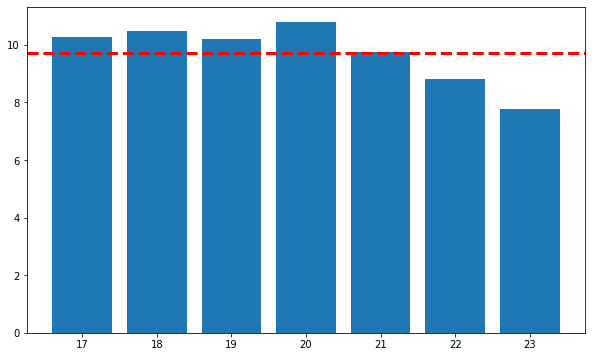

In [34]:
#Подсчет данных по Правобережному с 17 до 23 часов. С 9 по 25 января.
print(aiv(orders_in_hours, dt1, dt2, 17, 23, 'FRESH_MAX_МСК_ПРАВОБЕРЕЖНЫЙ', 'Express'))


   FactHour  Orders_D  Items_D    AIV  AIV_MEAN
0        17       648     7482  11.55     10.41
1        18       522     5543  10.62     10.41
2        19       550     5795  10.54     10.41
3        20       554     6155  11.11     10.41
4        21       433     4491  10.37     10.41
5        22       556     5193   9.34     10.41
6        23       426     3981   9.35     10.41


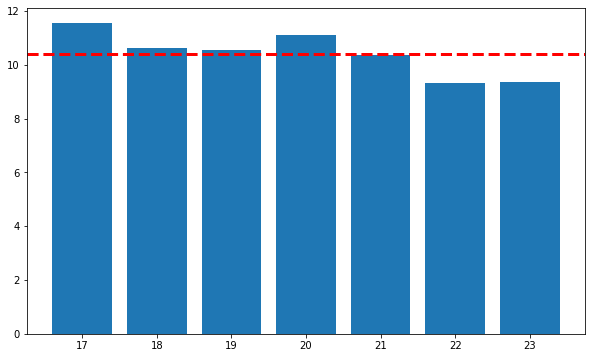

In [35]:
#Подсчет данных по Митино с 17 до 23 часов. С 9 по 25 января.
print(aiv(orders_in_hours, dt1, dt2, 17, 23, 'FRESH_MAX_МСК_МИТИНО', 'Express'))


   FactHour  Orders_D  Items_D    AIV  AIV_MEAN
0        17       777     9074  11.68     10.46
1        18       739     8595  11.63     10.46
2        19       860     9480  11.02     10.46
3        20       857     8638  10.08     10.46
4        21       768     8384  10.92     10.46
5        22       694     6500   9.37     10.46
6        23       389     3312   8.51     10.46


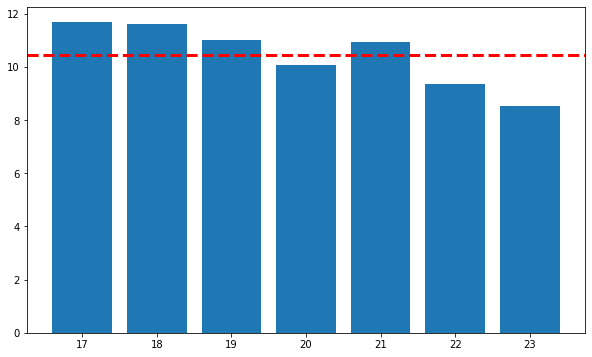

In [36]:
#Подсчет данных по Автограду с 17 до 23 часов. С 9 по 25 января.
print(aiv(orders_in_hours, dt1, dt2, 17, 23, 'FRESH_MAX_МСК_АВТОГРАД', 'Express'))


   FactHour  Orders_D  Items_D    AIV  AIV_MEAN
0        17       887     9591  10.81      9.82
1        18       918     9232  10.06      9.82
2        19      1040    10842  10.42      9.82
3        20      1092    11328  10.37      9.82
4        21       975     9513   9.76      9.82
5        22       801     7266   9.07      9.82
6        23       436     3597   8.25      9.82


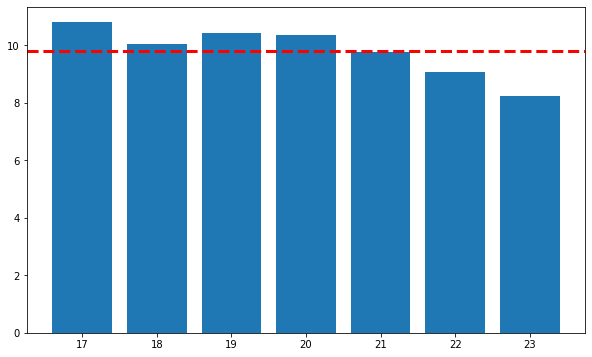

In [37]:
#Подсчет данных по Каширский Двор с 17 до 23 часов. С 9 по 25 января.
print(aiv(orders_in_hours, dt1, dt2, 17, 23, 'FRESH_MAX_МСК_КАШИРСКИЙ_ДВОР', 'Express'))

   FactHour  Orders_D  Items_D    AIV  AIV_MEAN
0        17       777     7785  10.02      9.82
1        18       844     8338   9.88      9.82
2        19       876     9528  10.88      9.82
3        20       865     8889  10.28      9.82
4        21       856     8458   9.88      9.82
5        22       736     6653   9.04      9.82
6        23       459     4018   8.75      9.82


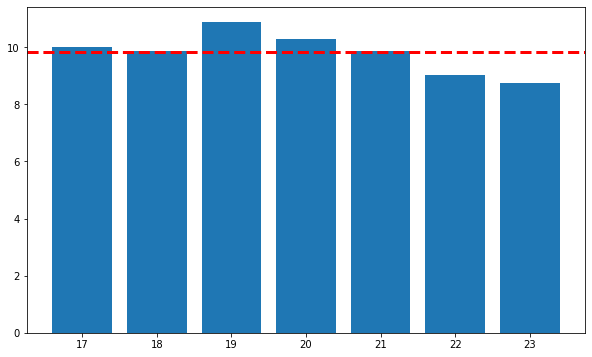

In [38]:
#Подсчет данных по Лобачевского с 17 до 23 часов. С 9 по 25 января.
print(aiv(orders_in_hours, dt1, dt2, 17, 23, 'FRESH_MAX_МСК_ЛОБАЧЕВСКОГО', 'Express'))

   FactHour  Orders_D  Items_D    AIV  AIV_MEAN
0        17       848     8832  10.42      9.89
1        18       992    11001  11.09      9.89
2        19      1029    10914  10.61      9.89
3        20      1050    10936  10.42      9.89
4        21       976     9782  10.02      9.89
5        22       823     7261   8.82      9.89
6        23       493     3869   7.85      9.89


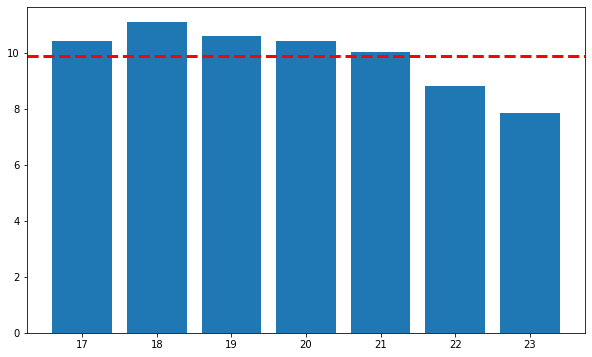

In [39]:
#Подсчет данных по Тюменский с 17 до 23 часов. С 9 по 25 января.
print(aiv(orders_in_hours, dt1, dt2, 17, 23, 'FRESH_MAX_МСК_ТЮМЕНСКИЙ', 'Express'))

   FactHour  Orders_D  Items_D    AIV  AIV_MEAN
0        17       309     3705  11.99     10.65
1        18       316     3611  11.43     10.65
2        19       386     4433  11.48     10.65
3        20       388     3823   9.85     10.65
4        21       317     2960   9.34     10.65
5        22       259     2592  10.01     10.65
6        23       155     1616  10.43     10.65


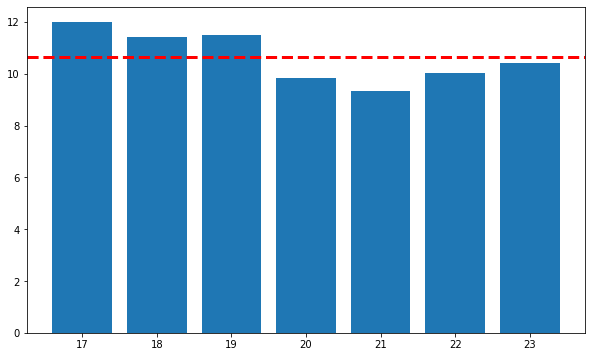

In [40]:
#Подсчет данных по Одинцово с 17 до 23 часов. С 9 по 25 января.
print(aiv(orders_in_hours, dt1, dt2, 17, 23, 'FRESH_MAX_МСК_ОДИНЦОВО', 'Express'))

   FactHour  Orders_D  Items_D    AIV  AIV_MEAN
0        17       914     9958  10.89      9.75
1        18       877     9222  10.52      9.75
2        19       992    10239  10.32      9.75
3        20      1044    10341   9.91      9.75
4        21       750     6791   9.05      9.75
5        22       585     4912   8.40      9.75
6        23       466     4268   9.16      9.75


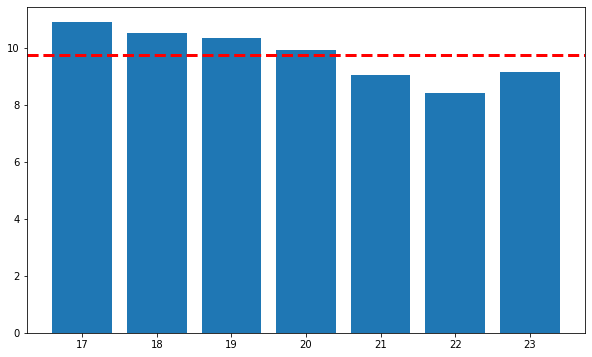

In [41]:
#Подсчет данных по Европолис с 17 до 23 часов. С 9 по 25 января.
print(aiv(orders_in_hours, dt1, dt2, 17, 23, 'FRESH_MAX_МСК_ЕВРОПОЛИС', 'Express'))

   FactHour  Orders_D  Items_D    AIV  AIV_MEAN
0        17       554     6270  11.32     10.36
1        18       553     6170  11.16     10.36
2        19       567     6556  11.56     10.36
3        20       626     6652  10.63     10.36
4        21       486     4842   9.96     10.36
5        22       435     3998   9.19     10.36
6        23       275     2397   8.72     10.36


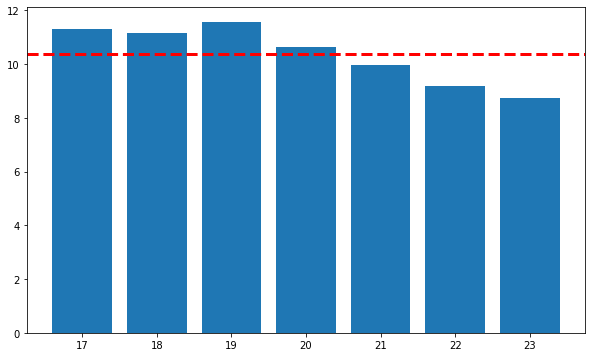

In [42]:
#Подсчет данных по Кунцево с 17 до 23 часов. С 9 по 25 января.
print(aiv(orders_in_hours, dt1, dt2, 17, 23, 'FRESH_MAX_МСК_КУНЦЕВО', 'Express'))

   FactHour  Orders_D  Items_D    AIV  AIV_MEAN
0        17       378     3882  10.27      9.96
1        18       477     5175  10.85      9.96
2        19       500     5472  10.94      9.96
3        20       543     5484  10.10      9.96
4        21       472     4594   9.73      9.96
5        22       420     3848   9.16      9.96
6        23       279     2422   8.68      9.96


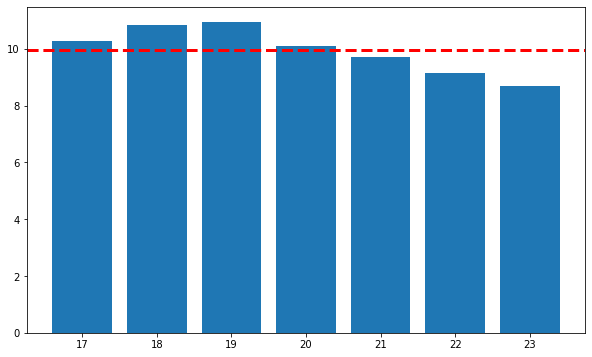

In [43]:
#Подсчет данных по Саларьево с 17 до 23 часов. С 9 по 25 января.
print(aiv(orders_in_hours, dt1, dt2, 17, 23, 'FRESH_MAX_МСК_САЛАРЬЕВО', 'Express'))

## Вывод: гипотезы №2, 3

"На ДС Лобачевского, Автоград, Каширский двор в вечернее время 17-23 преобладают большие экспресс заказы > 10 наименований в заказе (Average item order - AIV > 10)"
Гипотеза подтверждена на 1 складе - Автоград. Каширский Двор и Лобачевского средний показатель AIV - 9.82.
В выборке не учитывались праздничные дни с 1 по 8 января. Подсчет всех показателей проводился с 9 по 25 января.

ТОП 10 складов по GMV по наибольшему AIV в экспресс заказах с 17 по 23:
1.Одинцово - 10.65
2. Автоград - 10.46
3. Митино - 10.41
4. Кунцево - 10.36
5. Саларьево - 9.96
6. Тюменский - 9.89 
7. Каширский Двор - 9.82
8. Лобачевского - 9.82
9. Европолис - 9.75
10. Правобережный - 9.73

Больше всех AIV в экспресс заказах с 7 часов до 23 часов на Кунцево, Одинцово и Автограде - 10.6 item (в период с 9 по 25 января). Гипотеза "AIV экспрессов на ДС Лобачевского больше чем в топ-10 складов по торговле." - не подтверждена.


Данные рассчитаны с 9 по 25 января. Праздники были исключены из расчета. При изменении структуры заказов, в зависимости от сезона или акций, необходима повторная проверка гипотез.

In [44]:
#print(aiv(orders_in_hours, dt1, dt2, 7, 23, 'FRESH_MAX_МСК_ПРАВОБЕРЕЖНЫЙ', 'Express'))

In [45]:
#print(aiv(orders_in_hours, dt1, dt2, 7, 23, 'FRESH_MAX_МСК_МИТИНО', 'Express'))

In [46]:
#print(aiv(orders_in_hours, dt1, dt2, 7, 23, 'FRESH_MAX_МСК_АВТОГРАД', 'Express'))

In [47]:
#print(aiv(orders_in_hours, dt1, dt2, 7, 23, 'FRESH_MAX_МСК_КАШИРСКИЙ_ДВОР', 'Express'))

In [48]:
#print(aiv(orders_in_hours, dt1, dt2, 7, 23, 'FRESH_MAX_МСК_ЛОБАЧЕВСКОГО', 'Express'))

In [49]:
#print(aiv(orders_in_hours, dt1, dt2, 7, 23, 'FRESH_MAX_МСК_ТЮМЕНСКИЙ', 'Express'))

In [50]:
#print(aiv(orders_in_hours, dt1, dt2, 7, 23, 'FRESH_MAX_МСК_ОДИНЦОВО', 'Express'))

In [51]:
#print(aiv(orders_in_hours, dt1, dt2, 7, 23, 'FRESH_MAX_МСК_ЕВРОПОЛИС', 'Express'))


In [52]:
#print(aiv(orders_in_hours, dt1, dt2, 7, 23, 'FRESH_MAX_МСК_КУНЦЕВО', 'Express'))

In [53]:
#print(aiv(orders_in_hours, dt1, dt2, 7, 23, 'FRESH_MAX_МСК_САЛАРЬЕВО', 'Express'))